In [23]:
import numpy as np
from pandas import DataFrame
import keras
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
%matplotlib notebook

# Récupération et mise en forme des données

In [3]:
X = np.load('X.npy')
Y = np.load('Y.npy')

In [4]:
X.shape

(2062, 64, 64)

In [5]:
X_flat = np.array(X).reshape((2062, 64*64))
X_flat.shape

(2062, 4096)

In [6]:
Ydf = DataFrame(data=Y, columns=[9-x for x in range(10)])
Ydf.head()

,9,8,7,6,5,4,3,2,1,0
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
Ydf = Ydf[[x for x in range(10)]]
Ydf.head()

,0,1,2,3,4,5,6,7,8,9
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [8]:
Ydf['class']=(Ydf[range(10)].idxmax(axis=1)).astype('int')
Ydf[['class']]

,class
0,9
1,9
2,9
3,9
4,9
...,...
2057,0
2058,0
2059,0
2060,0


In [9]:
Y_flat = Ydf['class'].to_numpy()
Y_flat.shape

(2062,)

In [10]:
Y_flat = Y_flat.reshape(-1,1)
Y_flat.shape

(2062, 1)

In [11]:
from numpy import random as np_random

SEED = 42
np_random.seed(SEED)

In [12]:
from sklearn.model_selection import train_test_split

X_train_CNN, X_val_CNN, y_train_CNN, y_val_CNN = train_test_split(X, Y_flat, test_size=0.2)
X_train_CNN.shape

(1649, 64, 64)

In [13]:
X_val_CNN.shape

(413, 64, 64)

In [14]:
y_train_CNN.shape

(1649, 1)

In [15]:
X_train_CNN_reshape = X_train_CNN.reshape(1649,64,64,1)
X_train_CNN_reshape.shape

(1649, 64, 64, 1)

In [16]:
X_val_CNN_reshape = X_val_CNN.reshape(413,64,64,1)
X_val_CNN_reshape.shape

(413, 64, 64, 1)

# Model CNN

In [17]:
LEARNING_RATE = 0.001
BATCH_SIZE = X_train_CNN.shape[1]
EPOCHS = 50

In [18]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, MaxPooling2D, Dropout #create model

model_CNN = Sequential() #add model layers

model_CNN.add(Conv2D(4, kernel_size=3, 
                     activation='relu', 
                     input_shape=(64,64,1), 
                     kernel_initializer='glorot_normal'))
model_CNN.add(MaxPooling2D(pool_size=(2, 2)))
model_CNN.add(Conv2D(8, kernel_size=3, 
                     activation='relu', 
                     kernel_initializer='glorot_normal'))
model_CNN.add(MaxPooling2D(pool_size=(2, 2)))
model_CNN.add(Conv2D(16, kernel_size=3, 
                     activation='relu', 
                     kernel_initializer='glorot_normal'))
model_CNN.add(MaxPooling2D(pool_size=(2, 2)))
model_CNN.add(Conv2D(32, kernel_size=3, 
                     activation='relu', 
                     kernel_initializer='glorot_normal'))
model_CNN.add(MaxPooling2D(pool_size=(2, 2)))
model_CNN.add(Flatten())
# model_CNN.add(Dense(32, activation='relu'))
# model_CNN.add(Dropout(0.2))
model_CNN.add(Dense(16, activation='relu'))
model_CNN.add(Dropout(0.2))
model_CNN.add(Dense(10, activation='softmax'))







Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [19]:
model_CNN.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 62, 62, 4)         40        
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 31, 31, 4)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 29, 29, 8)         296       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 8)         0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 12, 12, 16)        1168      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 6, 6, 16)          0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 4, 4, 32)          4640      
__________

In [20]:
from keras.optimizers import Adam
from keras.optimizers import SGD
from keras.optimizers import RMSprop

model_CNN.compile(loss='sparse_categorical_crossentropy', 
                  optimizer=Adam(lr=LEARNING_RATE),
                  metrics = ['accuracy']) #optimizer=SGD(lr=LEARNING_RATE), optimizer=Adam(lr=LEARNING_RATE)

In [21]:
history_CNN = model_CNN.fit(X_train_CNN_reshape,
                            y_train_CNN,
                            validation_data=(X_val_CNN_reshape, y_val_CNN),
                            epochs=EPOCHS,
                            batch_size=BATCH_SIZE,
                            verbose=1)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 1649 samples, validate on 413 samples
Epoch 1/50





1649/1649 [==============================] - 3s 2ms/step - loss: 2.3013 - acc: 0.1098 - val_loss: 2.3032 - val_acc: 0.1041
Epoch 2/50
1649/1649 [==============================] - 2s 1ms/step - loss: 2.2993 - acc: 0.0982 - val_loss: 2.3006 - val_acc: 0.0896
Epoch 3/50
1649/1649 [==============================] - 2s 1ms/step - loss: 2.2889 - acc: 0.1013 - val_loss: 2.2848 - val_acc: 0.0847
Epoch 4/50
1649/1649 [==============================] - 2s 1ms/step - loss: 2.2551 - acc: 0.1346 - val_loss: 2.2303 - val_acc: 0.1283
Epoch 5/50
1649/1649 [==============================] - 2s 1ms/step - loss: 2.1461 - acc: 0.2080 - val_loss: 2.0255 - val_acc: 0.2736
Epoch 6/50
1649/1649 [==============================] - 2s 1ms/step - loss: 1.9171 - acc: 0.3135 - val_loss: 1.6872 - val_acc: 0.4479
Epoch 7/50
1649/1649 [=========================

Epoch 47/50
1649/1649 [==============================] - 2s 1ms/step - loss: 0.3802 - acc: 0.8502 - val_loss: 0.1910 - val_acc: 0.9419
Epoch 48/50
1649/1649 [==============================] - 2s 1ms/step - loss: 0.3810 - acc: 0.8478 - val_loss: 0.1896 - val_acc: 0.9467
Epoch 49/50
1649/1649 [==============================] - 2s 1ms/step - loss: 0.3753 - acc: 0.8441 - val_loss: 0.1809 - val_acc: 0.9492
Epoch 50/50
1649/1649 [==============================] - 2s 1ms/step - loss: 0.3688 - acc: 0.8478 - val_loss: 0.1624 - val_acc: 0.9613


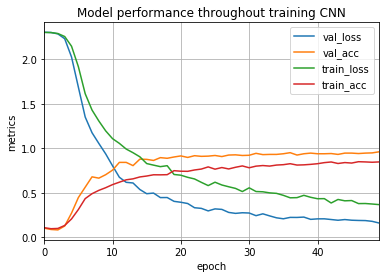

In [33]:
pd.DataFrame(history_CNN.history).plot()
plt.grid(True)
plt.title('Model performance throughout training CNN')
plt.ylabel('metrics')
plt.xlabel('epoch')
plt.legend(['val_loss', 'val_acc', 'train_loss', 'train_acc'], loc='upper right')
plt.show()

# Evaluate CNN

In [25]:
CNN_pred_val = model_CNN.predict(X_val_CNN_reshape)
CNN_pred_val

array([[1.88708829e-03, 1.70851563e-05, 9.07214508e-06, ...,
        2.40615671e-04, 2.03644746e-07, 1.04511157e-04],
       [9.94611859e-01, 6.25233781e-07, 4.46645106e-04, ...,
        3.65854049e-08, 1.33799083e-11, 1.29861204e-04],
       [9.74996437e-05, 2.96481448e-04, 2.28660656e-06, ...,
        1.00096804e-04, 1.99221333e-07, 1.66741404e-06],
       ...,
       [8.29040857e-07, 1.93890415e-07, 2.54441446e-08, ...,
        1.69635659e-05, 9.70820785e-01, 8.51580873e-03],
       [2.25057872e-03, 5.83394240e-08, 6.95849337e-07, ...,
        2.38468124e-06, 1.62482692e-03, 5.40068150e-02],
       [2.09009442e-11, 4.66891611e-03, 2.70576578e-07, ...,
        2.34114402e-03, 9.84929979e-01, 1.46401089e-05]], dtype=float32)

In [26]:
df_CNN_pred_val = DataFrame(CNN_pred_val, columns=[x for x in range(10)])
df_CNN_pred_val.head()

,0,1,2,3,4,5,6,7,8,9
0,0.001887,1.708516e-05,0.000009,0.884875,0.000073,2.222338e-07,1.127932e-01,2.406157e-04,2.036447e-07,0.000105
1,0.994612,6.252338e-07,0.000447,0.004749,0.000026,4.460872e-13,3.542550e-05,3.658540e-08,1.337991e-11,0.000130
2,0.000097,2.964814e-04,0.000002,0.100260,0.000006,1.922292e-06,8.992341e-01,1.000968e-04,1.992213e-07,0.000002
3,0.999374,1.193558e-10,0.000012,0.000134,0.000009,1.821495e-17,2.351533e-08,2.147725e-12,7.577687e-13,0.000471
4,0.000013,5.195061e-08,0.000001,0.000076,0.000904,1.586756e-06,2.089952e-04,7.715734e-07,1.047806e-02,0.988316


In [27]:
df_CNN_pred_val['class_CNN_pred']=(df_CNN_pred_val[range(10)].idxmax(axis=1)).astype('int')
df_CNN_pred_val.head()

,0,1,2,3,4,5,6,7,8,9,class_CNN_pred
0,0.001887,1.708516e-05,0.000009,0.884875,0.000073,2.222338e-07,1.127932e-01,2.406157e-04,2.036447e-07,0.000105,3
1,0.994612,6.252338e-07,0.000447,0.004749,0.000026,4.460872e-13,3.542550e-05,3.658540e-08,1.337991e-11,0.000130,0
2,0.000097,2.964814e-04,0.000002,0.100260,0.000006,1.922292e-06,8.992341e-01,1.000968e-04,1.992213e-07,0.000002,6
3,0.999374,1.193558e-10,0.000012,0.000134,0.000009,1.821495e-17,2.351533e-08,2.147725e-12,7.577687e-13,0.000471,0
4,0.000013,5.195061e-08,0.000001,0.000076,0.000904,1.586756e-06,2.089952e-04,7.715734e-07,1.047806e-02,0.988316,9


In [28]:
y_CNN_pred_val = df_CNN_pred_val['class_CNN_pred'].to_numpy()
y_CNN_pred_val = y_CNN_pred_val.reshape(-1,1)

In [29]:
y_CNN_pred_val.shape

(413, 1)

In [30]:
y_val_CNN.shape

(413, 1)

In [32]:
from sklearn.metrics import accuracy_score

accuracy_score(y_val_CNN, y_CNN_pred_val)

0.9612590799031477